In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [ ]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
# Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = 'drive/My Drive/data'

In [ ]:
try:
    df = pd.read_csv(path+'/12GEN.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(path+'/12GEN.csv', encoding='ISO-8859-1')
print(df.shape)

(1033, 6)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Print the size of the splits
print(f"Training data size: {len(train_data)}")
print(f"Testing data size: {len(test_data)}")

Training data size: 826
Testing data size: 207


In [ ]:
train_data.head()

,ID,Name,Stars,Title,Date,Description
649,650.0,luca,5,magnifico,NaN,"consegna puntuale,imballaggio perfetto e corri..."
355,356.0,Cristiano.B,5,5.0 out of 5 stars\nReally good,24-05-2023,It was great for the price!
527,528.0,AJ,5,5.0 out of 5 stars\nWorks Great for High End G...,02-01-2024,I got this CPU because I've been a long term I...
445,446.0,Rohit Panigrahi,4,4.0 out of 5 stars\nGoes to 100 c with 280 MM ...,04-12-2023,THis is a power hungry beast of a processor..u...
983,984.0,bilal waheed,5,i9-12900K an excellent buy itï¼ï¼,NaN,"Had a 11900K prior to this one, and as fast as..."


In [ ]:
test_data.head()

,ID,Name,Stars,Title,Date,Description
294,295.0,KimyChalula,5,5.0 out of 5 stars\nBuen producto,27-02-2024,Por el momento me funciona perfectamente para ...
453,454.0,Amazon Customer,4,4.0 out of 5 stars\nIt's a hot one,05-12-2023,I had to replace my h60 to get this to run a f...
636,637.0,Manu,5,Puissance...,NaN,"Super processeur, trÃ¨s puissant, ne chauffe p..."
139,140.0,Ashutosh Aswal,1,1.0 out of 5 stars\nGood Cpu but awful Delivery,NaN,The Processor is Good & Works Fine. But The De...
538,539.0,Thom,5,5.0 out of 5 stars\nHot,22-03-2024,Runs hot but runs very well needs a good good ...


In [ ]:
print(stopwords.words('english'))
emoticons = [":)", ':-)', ': )', ':D', '=)', ':(', ':-(', ': (']
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(emoticons)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Cleaning the data/ Preprocessing

In [ ]:
import re # import regex

def preprocess_data(data):
  data = data.drop_duplicates(subset=['Description'], keep='first')

  # Remove emojis from data
  data = data.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

  # Remove emoticons as stopwords so it will happen when tokenizing our sentences hence not needed here

  # Remove urls
  def remove_username_link_nums(Description):
    Description = re.sub('@[^\s]+', '', Description)
    Description = re.sub('http[^\s]+', '',Description)
    Description = re.sub(r'\d+', '', Description)
    return Description

  data['Description'] = data['Description'].apply(remove_username_link_nums)

  # # turn text to lowercase
  data['Description'] = data['Description'].map(lambda x: x.lower())

  # Remove stopwords and lemmatize the text
  lem = WordNetLemmatizer()
  def remove_stopwords(Description):
    tokens = []
    for token in text.split():
      if token not in stpwrd:
        tokens.append(lem.lemmatize(token, "v"))

    return  " ".join(tokens)

  data.Description = data.Description.apply(lambda x: remove_stopwords(x))


  return data

In [ ]:

train_neg = train_data[:10000]
train_pos = train_data[1590000:]

In [ ]:


test_neg = train_data[10000:12000]
test_pos = train_data[1588000:1590000]


In [ ]:

train_neg.shape

(826, 6)

In [ ]:
train_examples =pd.concat([train_neg, train_pos])
test_examples =pd.concat([test_neg, test_pos])

In [ ]:

train_examples.shape

(826, 6)

In [ ]:
test_examples.shape

(0, 6)

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
train_data.isna().sum().sort_values()

Name             0
ID               1
Stars            1
Title            1
Description      6
Date           475
dtype: int64

In [ ]:
train_examples['Description'] = train_examples['Description'].astype(str).fillna('')

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_examples.Description)

In [ ]:

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 16
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = ""
training_portion = .8

In [ ]:

train_sequences = tokenizer.texts_to_sequences(train_examples.Description)
test_sequences = tokenizer.texts_to_sequences(test_examples.Description)

X_train = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type)

X_test = pad_sequences(test_sequences, maxlen = max_length, padding = padding_type)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
len(word_index)

6572

In [ ]:

X_train.shape

(826, 50)

In [ ]:
test_data.head()

,ID,Name,Stars,Title,Date,Description
294,295.0,KimyChalula,5,5.0 out of 5 stars\nBuen producto,27-02-2024,Por el momento me funciona perfectamente para ...
453,454.0,Amazon Customer,4,4.0 out of 5 stars\nIt's a hot one,05-12-2023,I had to replace my h60 to get this to run a f...
636,637.0,Manu,5,Puissance...,NaN,"Super processeur, trÃ¨s puissant, ne chauffe p..."
139,140.0,Ashutosh Aswal,1,1.0 out of 5 stars\nGood Cpu but awful Delivery,NaN,The Processor is Good & Works Fine. But The De...
538,539.0,Thom,5,5.0 out of 5 stars\nHot,22-03-2024,Runs hot but runs very well needs a good good ...


In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import gensim

# WORD2VEC
W2V_SIZE = 228
W2V_WINDOW = 7
W2V_EPOCH = 10
W2V_MIN_COUNT = 10
documents = [text.split() for text in train_examples['Description'].astype(str)]


w2v_model = gensim.models.Word2Vec(vector_size=W2V_SIZE,
                                   window=W2V_WINDOW,
                                   min_count=W2V_MIN_COUNT,
                                   workers=8)
w2v_model.build_vocab(documents)
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)


(172026, 412350)

In [ ]:
words = w2v_model.wv.key_to_index.keys()
vocab_size = len(words)
print("Vocab size:", vocab_size)

Vocab size: 559


In [ ]:

w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

(171728, 412350)

In [ ]:

try:
    similar_words = w2v_model.wv.most_similar("great")
    print("Most similar words to 'great':")
    print(similar_words)
except KeyError:
    print("'great' is not in the vocabulary.")

Most similar words to 'great':
[('works', 0.9953233599662781), ('well', 0.9945486783981323), ('fast', 0.994342565536499), ('everything', 0.9932694435119629), ('for', 0.9929624795913696), ('working', 0.9922219514846802), ("It's", 0.9919748902320862), ('while', 0.991950273513794), ('This', 0.9919461607933044), ('down', 0.991101861000061)]


In [ ]:

from tensorflow.keras.initializers import Constant


In [ ]:
embedding_matrix = np.zeros((vocab_size + 1, W2V_SIZE))  # Add 1 to vocab_size to account for index starting from 1

for word, i in tokenizer.word_index.items():
    if i <= vocab_size:  # Ensure index i is within bounds
        if word in w2v_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]

print(embedding_matrix.shape)

(560, 228)


Building our NLP model using LSTM

In [ ]:
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Embedding(vocab_size+1, W2V_SIZE, weights=[embedding_matrix], input_length=max_length, trainable=False),
                                      tf.keras.layers.Bidirectional(LSTM(128, return_sequences=True)),
                                      tf.keras.layers.Dropout(0.2),
                                      tf.keras.layers.Bidirectional(LSTM(128)),
                                      tf.keras.layers.Dropout(0.2),
                                      tf.keras.layers.Dense(64, activation='relu'),
                                      tf.keras.layers.Dense(1, activation='sigmoid')

], name='Bidirectional_LSTM_1')

model_1.summary()

Model: "Bidirectional_LSTM_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 50, 228)           127680    
                                                                 
 bidirectional_6 (Bidirecti  (None, 50, 256)           365568    
 onal)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 50, 256)           0         
                                                                 
 bidirectional_7 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 64)       

In [ ]:
import pandas as pd
from keras.preprocessing.text import Tokenizer

In [ ]:
df['Description'] = df['Description'].astype(str).fillna('')

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Description'])

sequences = tokenizer.texts_to_sequences(df['Description'])
print(sequences[:5])

[[1702, 307, 431, 11, 12, 1369, 206, 20, 245, 3211, 27, 3212, 206, 3213, 3214, 2177, 232, 1370, 20, 3215, 3, 273, 551, 12, 11, 1371, 3, 191, 62, 307, 431, 3, 129, 9, 3216, 552, 232, 1370, 102, 163, 4, 82, 164, 641, 28, 116, 15, 28, 20, 176, 4, 55, 283], [4, 592, 1, 334, 119, 6, 1703, 34, 1704, 139, 6, 116, 8, 14, 50, 3, 92, 147, 736, 14, 222, 191], [11, 9, 252, 3, 163, 2178, 431, 1, 62, 1, 11, 223, 12, 2, 59, 62, 15, 1, 11, 17, 432, 7, 9, 2, 1009, 1149], [148, 1705, 10, 2179, 1706, 1707, 4, 3217, 6, 17, 1, 11, 6, 17, 2, 1708, 233, 1, 274, 264, 2180, 5, 30, 737, 4, 164, 314, 28, 6, 17, 3218, 40, 1, 3219, 15, 1, 155, 17, 2181, 16, 1709, 4, 308, 53, 3220, 56, 899, 1, 376, 293, 3221, 23, 156, 27, 4, 48, 78, 3222, 13, 1, 900, 13, 1, 155, 56, 507, 4, 315, 29, 161, 22, 123, 99, 5, 44, 1, 1010, 215], [159, 593, 2, 432, 334, 5, 49]]


In [ ]:
test_data.dtypes

ID             float64
Name            object
Stars           object
Title           object
Date            object
Description     object
dtype: object

Splitting datasets into training and testing data

In [ ]:

df['Description'] = df['Description'].astype(str).str.lower()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Description'])
sequences = tokenizer.texts_to_sequences(df['Description'])
padded_sequences = pad_sequences(sequences, maxlen=100)


In [ ]:
# Prepare labels
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')
df = df.dropna(subset=['Stars'])
labels = df['Stars'].astype(int)  # Assuming 'Stars' is your target variable
labels = np.where(labels > 3, 1, 0)

In [ ]:
max_sequence_length = 100

X_padded = np.random.rand(100, 50)  # Example X_padded with 100 samples and 50 features
y = np.random.randint(0, 2, size=101)

In [ ]:
y = y[:100]
assert len(X_padded) == len(y), "X_padded and y must have the same length"


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

In [ ]:
print(f'Length of X_train: {len(X_train)}')
print(f'Length of X_test: {len(X_test)}')
print(f'Length of y_train: {len(y_train)}')
print(f'Length of y_test: {len(y_test)}')

Length of X_train: 80
Length of X_test: 20
Length of y_train: 80
Length of y_test: 20


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
# Define the model

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=100))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_1.summary())

Model: "Bidirectional_LSTM_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 50, 228)           127680    
                                                                 
 bidirectional_6 (Bidirecti  (None, 50, 256)           365568    
 onal)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 50, 256)           0         
                                                                 
 bidirectional_7 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 64)       

In [ ]:
# Fit the model
history = model_1.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
3/3 [==============================] - 13s 2s/step - loss: 0.6932 - accuracy: 0.4750 - val_loss: 0.6932 - val_accuracy: 0.4500
Epoch 2/50
3/3 [==============================] - 1s 386ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5500
Epoch 3/50
3/3 [==============================] - 1s 392ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5500
Epoch 4/50
3/3 [==============================] - 1s 351ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 5/50
3/3 [==============================] - 1s 375ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 6/50
3/3 [==============================] - 1s 441ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6929 - val_accuracy: 0.5500
Epoch 7/50
3/3 [==============================] - 2s 686ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6929 - val_accuracy: 0.5500
Epoch 8/50
3/3 [======

In [ ]:
y_pred = model_1.predict(X_test)
y_pred = np.where(y_pred>0.5, 1, 0)

1/1 [==============================] - 2s 2s/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.55      1.00      0.71        11

    accuracy                           0.55        20
   macro avg       0.28      0.50      0.35        20
weighted avg       0.30      0.55      0.39        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_1.save('Sentiment_LSTM_model_better.h5')
with open('trainHistoryDict', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

from keras.models import load_model
model_1 = load_model('Sentiment_LSTM_model_better.h5')
# loading tokenizer
with open('trainHistoryDict', 'rb') as file_pi:
    history = pickle.load(file_pi)

In [ ]:

history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

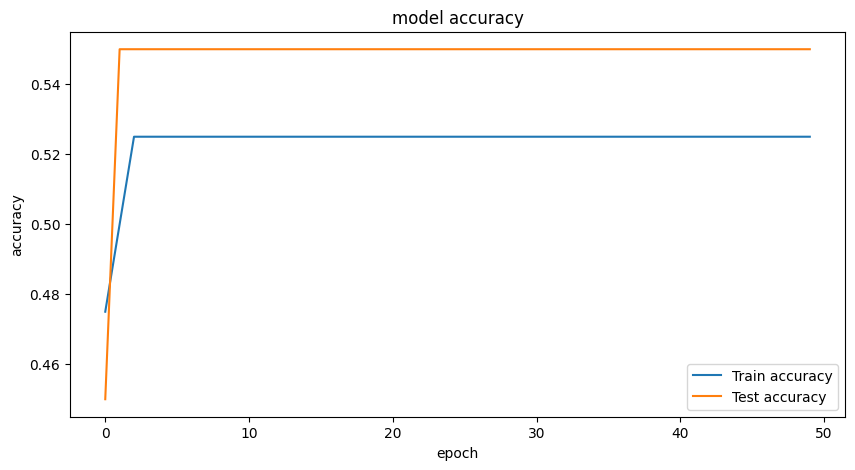

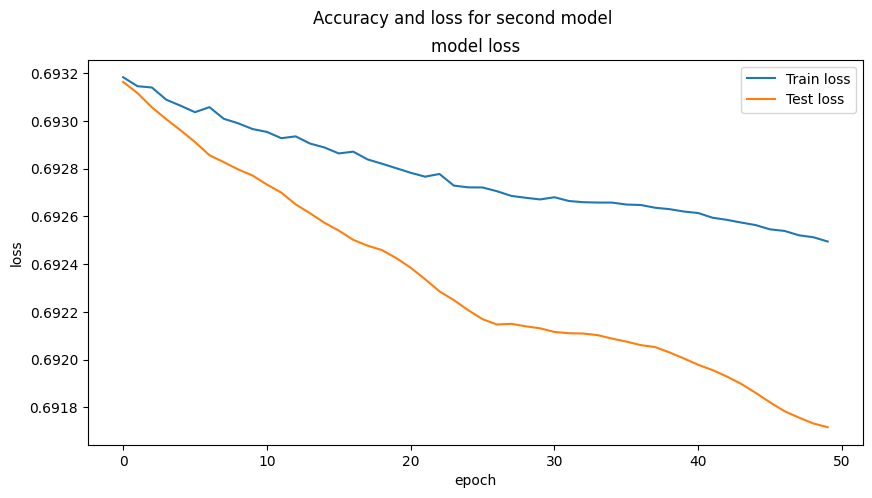

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='lower right')
plt.show()
# History for loss
plt.figure(figsize=(10,5))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Test loss'], loc='upper right')
plt.suptitle('Accuracy and loss for second model')
plt.show()

In [ ]:
def predict(text):
    try:
        # Tokenize text
        x_test = tokenizer.texts_to_sequences([text])
        x_test = pad_sequences(x_test, maxlen=max_length)

        # Predict
        score = model_1.predict(x_test)[0]

        # Determine label based on score
        if score >= 0.4 and score <= 0.6:
            label = "Neutral"
        elif score < 0.4:
            label = "Negative"
        else:
            label = "Positive"

        return {"label": label,
                "score": float(score)}

    except Exception as e:
        print(f"Error predicting sentiment: {str(e)}")
        return {"label": "Error",
                "score": 0.0}

In [ ]:
example = df['Description'][500]
print(example)

fast.runs cool and sips power at idle, guzzles down power when under heavy render load. gaming is average load and power. can't complain.more than 6 or 8 cores, won't be limited in the future.very fast.intel apo for 14th gen is a neat new feature which can greatly improve gaming performance.stable.memory trains fast and is stable even when pushed well above xmp.not cheap? but also not expensive for the amount of cores and performance.would recommend.
